# Using another approach 

In [8]:
import os
os.getcwd()

'C:\\Users\\Hp'

In [13]:
#set directory
os.chdir("D:\\health_pointe")

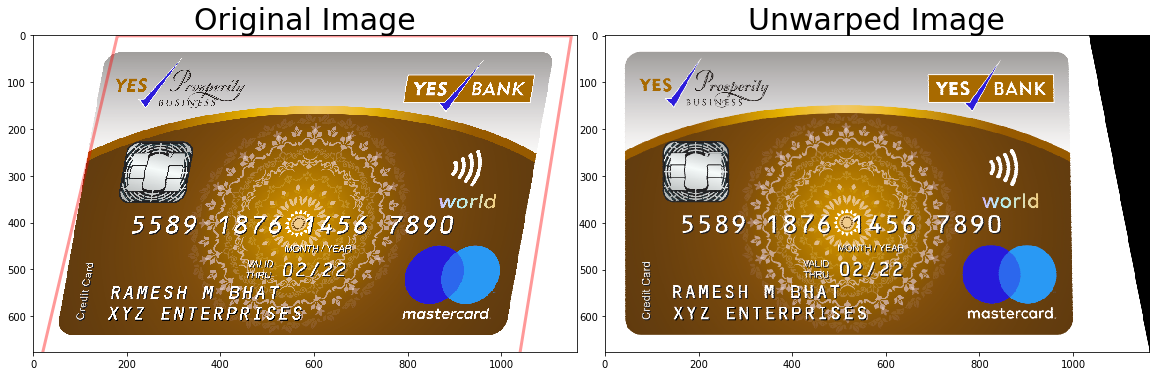

In [14]:
#import required packages
import cv2
import matplotlib.pyplot as plt
import numpy as np


def unwarp(img, src, dst, testing):
    h, w = img.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    cv2.imwrite('warped.png',warped) # saving wraped image(transformed)

    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img)
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(warped)
        ax2.set_title('Unwarped Image', fontsize=30)
        plt.show()
    else:
        return warped, M


im = cv2.imread("image.PNG")

w, h = im.shape[0], im.shape[1]
#setting coordinates to tilt it as per desired shape
src = np.float32([(180,     1),
                  (1150,    1),
                  (20,    680),
                  (1040,  680)])

dst = np.float32([(60, 1),
                  (1020, 1),
                  (20,  680),
                  (1040,680)])

unwarp(im, src, dst, True)
cv2.destroyAllWindows()

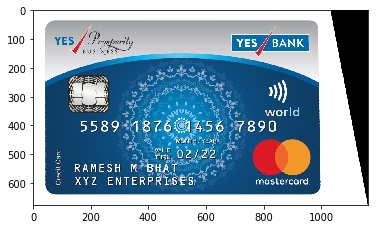

In [15]:
#view transformed image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

wraped = mpimg.imread('warped.PNG')
plt.imshow(wraped)


# Image got successfully tranformed to desired shape